# **LAB 01: TRỰC QUAN HÓA DỮ LIỆU VỚI PYTHON**

#### Môn học: Trực quan hóa dữ liệu

#### Nhóm: 5


## **A. Thu thập dữ liệu**


Đối với một doanh nghiệp, một trong những yếu tố cốt lõi để cấu thành nên sự thành công đó chính là khách hàng. Doanh nghiệp không bán sản phẩm họ cung cấp, mà họ bán sản phẩm mà người khác cần. Thật khó để một doanh nghiệp có thể duy trì nếu họ không có hoặc mất đi những khách hàng của chính họ. Vậy làm thế nào để một doanh nghiệp có thể thu hút ngày càng nhiều khách hàng cũng như đồng thời giữ được những người trung thành, đặc biệt là trong một thị trường đòi hỏi nhiều hơn là chỉ bán dịch vụ và sản phẩm đơn thuần. Chính vì thế, việc tìm hiểu và phân tích nhu cầu khách hàng chính là một trong những việc làm quan trọng, một bài toàn toán khó cho các doanh nghiệp hiện nay.

Thấy được tầm quan trọng của việc phân tích khách hàng, nhóm 5 lựa chọn bộ dữ liệu *Shop Customer Data* cho lab 01. Bộ dữ liệu được chia sẻ miễn phí trên nền tảng Kaggle. (Link dataset: https://www.kaggle.com/datasets/datascientistanna/customers-dataset)

License: <a href="http://opendatacommons.org/licenses/dbcl/1.0/">Database: Open Database, Contents: Database Contents</a>


Bộ dữ liệu được thu thập thủ công. Phương pháp thu thâp là thu thập thông qua nghiên cứu kéo dài 1 năm về khách hàng của các cửa hàng địa phương.


## **B. Khám phá dữ liệu**

### **Import các thư viện**

In [1]:
#!pip install pingouin
#!pip install category_encoders
#!pip install plotly
#!pip install yellowbrick

In [2]:
import pandas as pd

import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib.pyplot as plt
import numpy as np

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import pingouin as pg #for ANOVA

#from sklearn.preprocessing import OneHotEncoder
from sklearn import decomposition
import category_encoders as ce
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline  
py.init_notebook_mode(connected=True)

### **Đọc file dữ liệu vào dataframe**

In [3]:
df=pd.read_csv("Customers.csv")
df.head()


CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

### **Tiền xử lý và khám phá dữ liệu**

**Số dòng** và **số cột** của bộ dữ liệu: 2000 dòng, 8 cột

In [4]:
num_rows, num_cols = df.shape
print("Num rows: ", num_rows)
print("Num cols: ", num_cols)

Num rows:  2000
Num cols:  8


**Ý nghĩa của mỗi dòng**: Thông tin của một khách hàng mua sắm ở cửa hàng. Không có dòng nào mang ý nghĩa khác. 

In [5]:
df.head(1)

CustomerID Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1   Male   19              15000                      39   

   Profession  Work Experience  Family Size  
0  Healthcare                1            4

Kiểm tra xem có dòng nào bị trùng lặp hay không:

In [6]:
df.duplicated().sum()

0

**Ý nghĩa của mỗi cột**: 

- `Customer ID`: ID khách hàng
- `Gender`: Giới tính
- `Age`: Tuổi
- `Annual Income`: Thu nhập hàng năm (đơn vị: $)
- `Spending Score`: Điểm do cửa hàng chấm, dựa trên hành vi và tính chất chi tiêu của khách hàng. Nằm trong khoảng [0,100]
- `Profession`: Nghề nghiệp
- `Work Experience`: Kinh nghiệm làm việc (đơn vị: năm)
- `Family Size`: Số thành viên trong gia đình

Ta sẽ thực hiện chuẩn hóa tên các cột để thuận tiện hơn cho việc sử dụng về sau:

In [7]:
df = df.rename(columns={'Annual Income ($)': 'Annual_Income',
                        'Spending Score (1-100)': 'Spending_Score',
                        'Work Experience':'Work_Experience',
                        'Family Size':'Family_Size'})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score',
       'Profession', 'Work_Experience', 'Family_Size'],
      dtype='object')

**Kiểu dữ liệu của mỗi cột:**

In [8]:
df.dtypes

CustomerID          int64
Gender             object
Age                 int64
Annual_Income       int64
Spending_Score      int64
Profession         object
Work_Experience     int64
Family_Size         int64
dtype: object

Các cột đều có kiểu dữ liệu phù hợp, không cần xử lý.

**Kiểm tra giá trị bị thiếu:**

<AxesSubplot:>

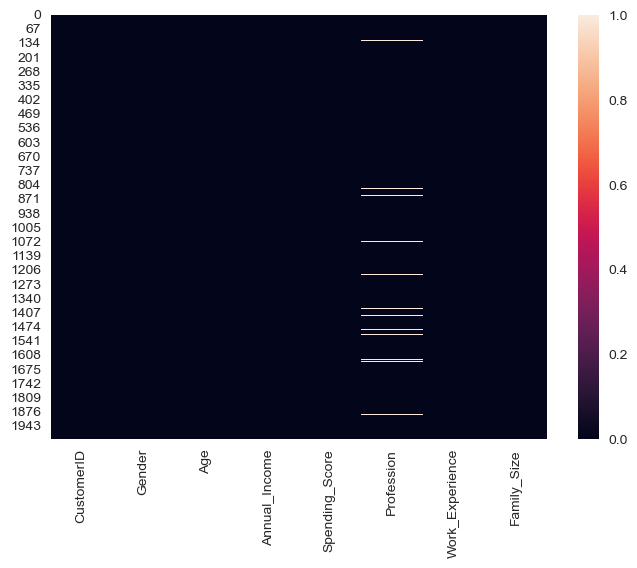

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isna().sum()

CustomerID          0
Gender              0
Age                 0
Annual_Income       0
Spending_Score      0
Profession         35
Work_Experience     0
Family_Size         0
dtype: int64

Có 35 giá trị thiếu ở cột `Profession`.

**Phân bố giá trị của các cột numerical:**

Dựa vào việc kiểm tra kiểu dữ liệu của các cột ở bước trên, ta đang có 6 cột có vẻ thuộc nhóm **numeric** là: `CustomerID`, `Age`, `Annual_Income`, `Spending_Score`, `Work_Experience`, `Family_Size`. Tuy nhiên, cột `CustomerID` thật ra lại là dạng **categorical** (vì ID là mã được đánh dưới dạng số)

Bảng thống kê cơ bản về các phân bố giá trị của các thuộc tính **numeric**:

In [11]:
df[['Age', 'Annual_Income', 'Spending_Score', 'Work_Experience', 'Family_Size']].describe()

Age  Annual_Income  Spending_Score  Work_Experience  \
count  2000.000000    2000.000000     2000.000000      2000.000000   
mean     48.960000  110731.821500       50.962500         4.102500   
std      28.429747   45739.536688       27.934661         3.922204   
min       0.000000       0.000000        0.000000         0.000000   
25%      25.000000   74572.000000       28.000000         1.000000   
50%      48.000000  110045.000000       50.000000         3.000000   
75%      73.000000  149092.750000       75.000000         7.000000   
max      99.000000  189974.000000      100.000000        17.000000   

       Family_Size  
count  2000.000000  
mean      3.768500  
std       1.970749  
min       1.000000  
25%       2.000000  
50%       4.000000  
75%       5.000000  
max       9.000000

Nhìn tổng quan, khách hàng có tuổi nhỏ nhất là 0. Ta thử truy vấn:

In [12]:
df[df["Age"]==0]

CustomerID  Gender  Age  Annual_Income  Spending_Score     Profession  \
211          212  Female    0          22000              92         Artist   
228          229    Male    0          33000              64      Marketing   
333          334    Male    0         173743              96         Artist   
440          441  Female    0          57373              29            NaN   
443          444  Female    0          68761              16         Lawyer   
466          467    Male    0         186002              80         Doctor   
559          560    Male    0         151298              89         Artist   
562          563  Female    0         142892              25  Entertainment   
767          768  Female    0         143910              22      Marketing   
794          795  Female    0         147719              86         Lawyer   
821          822  Female    0         116759              28      Marketing   
852          853  Female    0         121926              41         Lawyer   
863          864  Female    0         141351              10       Engineer   
938          939  Female    0         116782              73         Artist   
1248        1249  Female    0         143082              63  Entertainment   
1271        1272  Female    0          61228              81  Entertainment   
1562        1563  Female    0          94014              53       Engineer   
1583        1584  Female    0         120899               7      Marketing   
1603        1604    Male    0         143455              62     Healthcare   
1677        1678    Male    0         126060              92         Doctor   
1757        1758    Male    0         108169              24      Executive   
1917        1918  Female    0          73128              74         Artist   
1925        1926  Female    0         105935              46         Doctor   
1979        1980    Male    0         165321              93         Doctor   

      Work_Experience  Family_Size  
211                 2            1  
228                 1            1  
333                 0            4  
440                 0            7  
443                 1            4  
466                15            2  
559                 0            6  
562                 8            1  
767                 1            7  
794                 1            7  
821                 7            3  
852                 7            1  
863                 0            2  
938                 9            5  
1248                0            7  
1271                1            6  
1562                9            5  
1583                2            6  
1603                1            6  
1677                1            3  
1757               10            3  
1917                7            5  
1925                4            5  
1979                8            1

Có vẻ như người thu thập đã điền giá trị 0 cho các khách hàng không có thông tin về độ tuổi. 

**Phân bố giá trị của các cột categorical:**

Có 3 cột thuộc nhóm **categorical** là: `CustomerID`, `Gender`, `Profession`

Kiểm tra số giá trị trùng lặp ở cột `CustomerID`:

In [13]:
df["CustomerID"].duplicated().sum()

0

Mỗi ID khách hàng là duy nhất, không có sự trùng lặp

Bỏ qua thuộc tính `CustomerID`, ta có bảng thống kê cơ bản về các phân bố giá trị của các thuộc tính **categorical** còn lại:

In [14]:
df[['Gender','Profession']].describe()

Gender Profession
count     2000       1965
unique       2          9
top     Female     Artist
freq      1186        612

**Làm sạch dữ liệu:**

Ta lần lượt đi kiểm tra giá trị trong từng cột dữ liệu và tiền xử lý (nếu cần)

**Cột `CustomerID`**: Dựa vào kết quả kiểm tra các bước ở trên, các giá trị ở cột `CustomerID` đều khác nhau nên không có vấn đề gì cần tiền xử lý.

**Cột `Gender`**:

In [15]:
fig = go.Figure(data=[go.Pie(labels=["Male","Female"], 
                             values=[df[df["Gender"]=='Male']["Gender"].count(),df[df["Gender"]=='Female']["Gender"].count()], 
                             pull=[0, 0.05])])

fig.update_layout(
    autosize=False,
    width=450,
    height=450,
    title ="Gender Distribution")
fig.show()

**Cột `Profession`**:

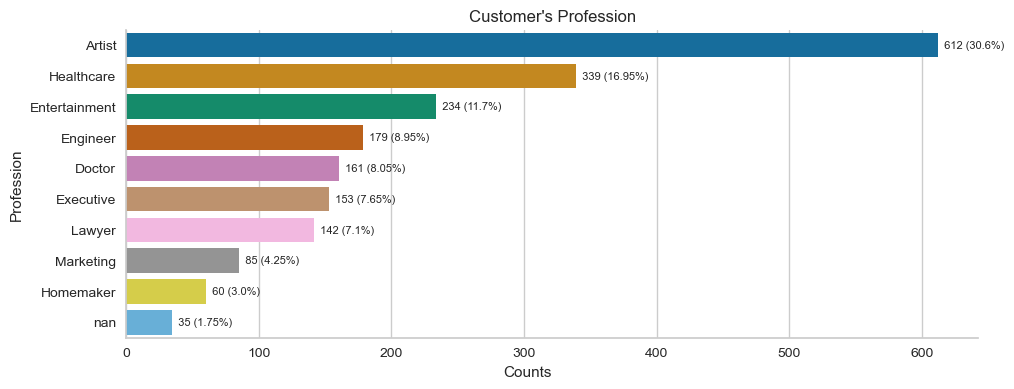

In [16]:
plt.figure(figsize=(11,4))

data = df['Profession'].astype(str).value_counts()
x = data.index.tolist()
y = data.values
bar = sns.barplot(y=x, x=y, palette='colorblind')

for n,i in enumerate(y):
    porc = f'{round((i/sum(df["Profession"].astype(str).value_counts().values))*100, 2)}%'
    bar.annotate(f'  {i} ({porc})',
                    xy=(i,n),
                    verticalalignment='center',
                    horizontalalignment='left',
                    fontsize=8)    

bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)

plt.title("Customer's Profession")
bar.set_ylabel('Profession', horizontalalignment='center')
bar.set_xlabel('Counts', horizontalalignment='right')

plt.show()


Điền các giá trị bị thiếu trong cột `Profession` bằng giá trị mới là "other". Việc điền bằng một giá trị mới thay vì dùng các giá trị hiện có sẽ giúp không làm thay đổi nhiều phân bố của các giá trị cũ. Ngoài ra dùng giá trị là 'other', ta không cần train lại mô hình học máy nếu có xuất hiện thêm một vài giá trị `Profession` mới nào khác trong tương lai.

In [17]:
df['Profession'] = df['Profession'].fillna('Other')
df['Profession'].isna().sum()

0

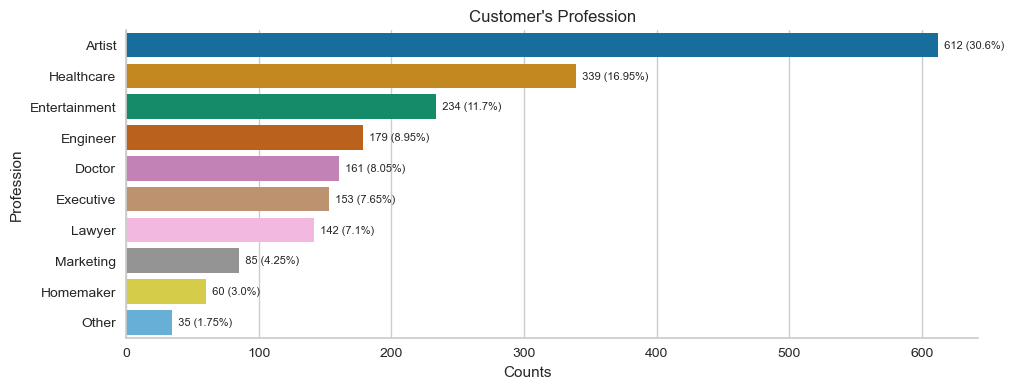

In [18]:
plt.figure(figsize=(11,4))

data = df['Profession'].astype(str).value_counts()
x = data.index.tolist()
y = data.values
bar = sns.barplot(y=x, x=y, palette='colorblind')

for n,i in enumerate(y):
    porc = f'{round((i/sum(df["Profession"].astype(str).value_counts().values))*100, 2)}%'
    bar.annotate(f'  {i} ({porc})',
                    xy=(i,n),
                    verticalalignment='center',
                    horizontalalignment='left',
                    fontsize=8)    

bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)

plt.title("Customer's Profession")
bar.set_ylabel('Profession', horizontalalignment='center')
bar.set_xlabel('Counts', horizontalalignment='right')

plt.show()


**Cột `Age`**:

In [19]:
fig=px.histogram(df, x="Age")
fig.show()

Phân bố có: vẻ đều từ 0 đến 99 tuổi, nhưng đều này có vẻ không hợp lý vì độ tuổi lao động ít nhất là từ 18 tuổi trở lên. Ta thử truy vấn:

In [20]:
df.query("Age<18")

CustomerID  Gender  Age  Annual_Income  Spending_Score  Profession  \
202          203  Female   16          60000               0    Engineer   
210          211  Female    1          57000              93    Engineer   
211          212  Female    0          22000              92      Artist   
228          229    Male    0          33000              64   Marketing   
229          230    Male   15          94000              30  Healthcare   
...          ...     ...  ...            ...             ...         ...   
1974        1975  Female   14         153145              59  Healthcare   
1979        1980    Male    0         165321              93      Doctor   
1980        1981  Female   10          86925              76      Artist   
1984        1985  Female    2         153622              51      Lawyer   
1986        1987  Female    4          68094              61      Doctor   

      Work_Experience  Family_Size  
202                 6            8  
210                 1            2  
211                 2            1  
228                 1            1  
229                 7            2  
...               ...          ...  
1974                8            6  
1979                8            1  
1980                7            2  
1984                6            6  
1986                4            7  

[332 rows x 8 columns]

Ta sẽ thực hiện thay thế những khách hàng có độ tuổi nhỏ hơn 18 bằng độ tuổi trung bình theo `Profession` và `Gender`: 

In [21]:
mean_age = df.groupby(['Gender', 'Profession'])['Age'].mean()

df['Age'] = df.apply(lambda row: int(mean_age[(row['Gender'], row['Profession'])])
                                 if row['Age'] < 18
                                 else row['Age'], axis=1)

**Cột `Annual_Income`**:

In [22]:
fig = px.violin(df,x='Annual_Income',width=800, height=300,box=True)
fig.show()

In [23]:
fig = px.box(df, y="Annual_Income",x='Age')
fig.show()

Nhìn chung thì có một vài outliers, có thể đây là những trường hợp cá biệt nên ta sẽ không xử lý.

**Cột `Spending_Score`**: là cột do chủ cửa hàng điền.

In [24]:
fig = px.violin(df,x='Spending_Score',width=800, height=300,box=True)
fig.show()

**Cột `Work_Experience`**:

<AxesSubplot:xlabel='Work_Experience', ylabel='count'>

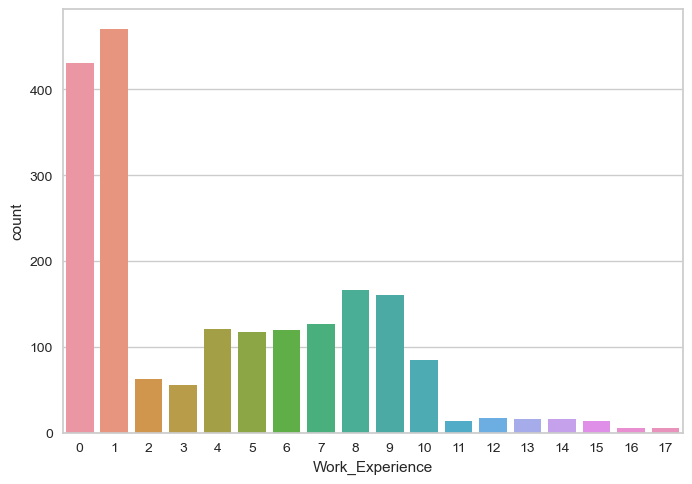

In [25]:
#fig = px.violin(df,x='Work_Experience',width=800, height=400,box=True)
#fig.show()

sns.countplot(data=df,x='Work_Experience')

Phân bố dữ liệu của `Work_Experience` bị lệch phải, giá trị lớn nhất là 17. Thực hiện truy vấn những dòng này:

In [26]:
df.query("Work_Experience==17")

CustomerID  Gender  Age  Annual_Income  Spending_Score Profession  \
392         393    Male   21         119116              30     Artist   
405         406  Female   65         119889              11     Artist   
473         474    Male   20         130813              92     Artist   
566         567  Female   19         180331              14     Artist   
603         604  Female   91          69720              78     Lawyer   

     Work_Experience  Family_Size  
392               17            4  
405               17            6  
473               17            5  
566               17            5  
603               17            6

Mặc dù có dòng có giá trị `Age` chênh lệch khá ít so với `Work_Experience` nhưng nhìn chung những outlier vẫn khá hợp lý (vì `Profession` là "Artist"), ta sẽ giữ lại các dòng này.

Ngoài  `Profession` là *'Artist','Homemaker','Entertainment','Other'* liệu có ai đã bắt đầu làm việc khi dưới 18 tuổi?

In [27]:
df.query("Profession!=['Artist','Homemaker','Entertainment','Other'] and Age-Work_Experience<18 ")

CustomerID  Gender  Age  Annual_Income  Spending_Score  Profession  \
47            48  Female   27          71000              47  Healthcare   
99           100    Male   20          80000              49    Engineer   
115          116  Female   19          51000              50   Executive   
138          139    Male   19          22000              10   Marketing   
353          354    Male   23         181760              35  Healthcare   
355          356    Male   22         172923              20    Engineer   
357          358    Male   20         184324              51   Marketing   
388          389  Female   26         117454               8  Healthcare   
389          390  Female   18          86203              23      Doctor   
407          408    Male   18         103896              36   Executive   
522          523    Male   20         119952               2  Healthcare   
664          665    Male   26          79526               6   Marketing   
819          820  Female   19         117477              48  Healthcare   
857          858    Male   21         155151              16   Marketing   
897          898    Male   18          62362              81      Lawyer   
977          978    Male   18         129260              11      Doctor   
981          982    Male   23          67535              97  Healthcare   
1161        1162  Female   20         155951              21  Healthcare   
1326        1327    Male   18          77873              49   Executive   
1416        1417    Male   23         112089              74  Healthcare   
1421        1422  Female   20         124852              39  Healthcare   
1437        1438    Male   21         159572              42  Healthcare   
1492        1493    Male   21          85339               6      Doctor   
1514        1515    Male   21         163509              21  Healthcare   
1587        1588  Female   19         181795              59  Healthcare   
1695        1696  Female   18         149915              94      Doctor   
1801        1802    Male   20         189650              60      Lawyer   
1845        1846  Female   20         113217              41      Lawyer   
1901        1902  Female   20         131810              16  Healthcare   
1915        1916  Female   18         134752              47    Engineer   
1994        1995  Female   19          54121              89    Engineer   

      Work_Experience  Family_Size  
47                 12            1  
99                  3            3  
115                 8            4  
138                 8            4  
353                14            3  
355                 6            1  
357                13            5  
388                16            2  
389                13            1  
407                16            4  
522                 8            2  
664                 9            7  
819                 6            7  
857                14            3  
897                 7            3  
977                 1            3  
981                 7            6  
1161                7            4  
1326                6            5  
1416                7            7  
1421                5            5  
1437                5            5  
1492                4            7  
1514               10            1  
1587                3            5  
1695               14            1  
1801                8            4  
1845                9            1  
1901                5            7  
1915                6            5  
1994                6            3

Ta sẽ loại bỏ những dòng này:

In [28]:
df = df.drop(df.query("Profession!=['Artist','Homemaker','Entertainment','Other'] and Age-Work_Experience<18 ").index)

**Cột `Family_Size`:**

In [29]:
fig = px.violin(df,x='Family_Size',width=800, height=300,box=True)
fig.show()

Dataframe sau khi thực hiện tiền xử lý:

In [30]:
df

CustomerID  Gender  Age  Annual_Income  Spending_Score     Profession  \
0              1    Male   19          15000              39     Healthcare   
1              2    Male   21          35000              81       Engineer   
2              3  Female   20          86000               6       Engineer   
3              4  Female   23          59000              77         Lawyer   
4              5  Female   31          38000              40  Entertainment   
...          ...     ...  ...            ...             ...            ...   
1995        1996  Female   71         184387              40         Artist   
1996        1997  Female   91          73158              32         Doctor   
1997        1998    Male   87          90961              14     Healthcare   
1998        1999    Male   77         182109               4      Executive   
1999        2000    Male   90         110610              52  Entertainment   

      Work_Experience  Family_Size  
0                   1            4  
1                   3            3  
2                   1            1  
3                   0            2  
4                   2            6  
...               ...          ...  
1995                8            7  
1996                7            7  
1997                9            2  
1998                7            2  
1999                5            2  

[1969 rows x 8 columns]

## **C. Khám phá mối quan hệ trong dữ liệu**

##### **Mối Quan Hệ Giữa 2 Thuộc Tính: `Age` và `Annual Income`**

Ta trực quan hóa dữ liệu của 2 thuộc tính bằng Scatter plot:

In [31]:
fig = px.scatter(df,x='Age', y='Annual_Income',title="Scatter plot of Age vs. Annual Income")
fig.show()

Nhìn vào sự phân tán của dữ liệu giữa độ tuổi và thu nhập hàng năm của các khách hàng. Có thể thấy rằng không có mối quan hệ tuyệt đối giữa độ tuổi và thu nhập hàng năm, mặc dù có thể nhận thấy xu hướng chung cho rằng thu nhập hàng năm có xu hướng tăng khi độ tuổi tăng. Khách hàng phần lớn có thu nhập trên 50k, ta thấy rõ ràng ở nhóm khách hàng có độ tuổi từ 60 trở lên.

Ta thử xem giá trị **correlation coefficient**:

In [32]:
corr = df['Age'].corr(df['Annual_Income'])
print("Correlation_coefficient: ",corr)

Correlation_coefficient:  0.0899309943330235


Mức độ tương quan giữa độ tuổi và thu nhập hàng năm khá thấp. (correlation coefficient = 0.09/1)

##### **Mối Quan Hệ Giữa 2 Thuộc Tính: `Annual Income` và `Gender`**

In [33]:
fig=px.violin(df,y = 'Annual_Income' , x = 'Gender',title="Annual Income by Gende",box=True,color='Gender')
fig.update_traces(meanline_visible=True)

fig.update_layout(
    autosize=False,
    width=600,
    height=450,
    title ="Gender Distribution")
fig.show()

- Hai violin plot có hình dạng gần tương đồng cho thấy mức độ phân phối thu nhập hàng năm của nữ và nam là gần giống nhau.
- Biểu đồ violin plot rộng ở giữa và hẹp ở hai đầu cho thấy mức thu nhập hàng năm tập trung ở vùng 50000 - 150000 và thưa thót ở hai vùng 0-50000 và 150000-200000.
- Giá trị trung bình của thu nhập hàng năm ở nhóm nam cao hơn nhóm nữ.
- Mức lương cao nhất của thu nhập hàng năm thuộc về nam giới và nhóm nam giới có khoảng thu nhập hằng năm cao hơn nhóm nữ giới.
- Đối với cả nam và nữ, phân phối của annual income khá đều và không có nhiều sự khác biệt lớn giữa hai giới tính.

##### **Mối Quan Hệ Giữa 2 Thuộc Tính: `Age` và `Gender`**

In [34]:
fig = ff.create_distplot([df[df["Gender"]=='Male']["Age"],df[df["Gender"]=='Female']["Age"]], ["Male","Female"])

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    title ="Age Distribution by Gender")
fig.show()

Nhìn vào phân phối, đối tượng khách hàng chủ yếu của cửa hàng là Phụ nữ. Độ tuổi chủ yếu của khách đến mua hàng là từ 40-60 tuổi.

##### **Mối Quan Hệ Giữa 2 Thuộc Tính: `Family_Size` và `Spending_Score`**

In [35]:
fig = px.box(df,x='Family_Size', y="Spending_Score",color='Family_Size',title="Boxplot of Family_Size by Spending_Score")
fig.show()

- Ngoại trừ nhóm gia đình có Family_Size = 9 (chỉ có 1 giá trị) thì các nhóm còn lại đều phân phối Spending_Score khá tương đồng.
- Spending_Score trung vị của các nhóm gia đình xấp xỉ 50, trong đó nhóm gia đình có Family_Size = 3 có trung vị Spending_Score cao nhất.
- Nhóm gia đình có Family_Size = 8 có khoảng tứ phân vị (IQR) lớn nhất (Từ 16 đến 82.5) còn nhóm gia đình có Family_Size = 7 có Spending_Score trải ngắn nhất (Từ 29.75 đến 71)

##### **Mối Quan Hệ Giữa 2 Thuộc Tính: `Work Experience` và `Profession`**

In [36]:
fig=px.violin(df,x="Work_Experience",y="Profession",color="Profession",title="Ridgeline Plot of Work Experience in Different Professions")
fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(xaxis_range=[0,df["Work_Experience"].max()])
#fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)
fig.show()

Một số quan sát thông qua việc trực quan hóa dữ liệu: 

- Phần lớn các nhóm ngành nghề đều có phân bố tuổi nghề cao nhất ở khoảng 0-3 năm, sau đó phân bố giảm dần.
- Một số ngành nghề như Engineer, Entertainment và Healthcare có phân bố tăng nhẹ ở khoảng 8-10 năm tuổi nghề.
- Riêng nhóm ngành nghề Homemaker lại có phân bố tuổi nghề tăng dần và cao nhất ở khoảng 8-10 năm.
- Ngành Doctor có nhiều người có tuổi nghề cao nhất.

Tuy nhiên, từ những quan sát này chưa thể rút ra rằng có mối tương quan giữa ngành nghề và tuổi nghề hay không, vì vậy ta sẽ sử dụng **phương pháp ANOVA** (phân tích phương sai) để nghiên cứu ảnh hưởng của ngành nghề lên tuổi nghề. Ta sử dụng phương pháp này do biến Profession là biến định tính gồm nhiều nhóm khác nhau và Work_Experience là biến định lượng.

**Giả thuyết H0:** trung bình giá trị giữa các nhóm bằng nhau, tức là biến nguyên nhân định tính không có tác động gì lên kết quả của biến định lượng.

**Đối thuyết H1:** biến nguyên nhân định tính ảnh hưởng đến biến định lượng.

In [37]:
pg.welch_anova(dv='Work_Experience', between='Profession', data=df)

Source  ddof1      ddof2         F    p-unc       np2
0  Profession      9  392.57306  3.655079  0.00021  0.014671

Ta thấy $p-value = 0.00021 < 0.05$, vì vậy ta có thể bác bỏ giả thuyết H0 với mức ý nghĩa 5%. Điều này đồng nghĩa với việc ta có thể kết luận rằng có mối tương quan giữa biến Profession và Work_Experience, hay ngành nghề có ảnh hưởng đến tuổi nghề. Từ đây, ta có thể tiếp tục phân tích những ngành nghề nào có tuổi nghề cao hơn và lý do dẫn tới tuổi nghề cao, qua đó đề xuất giải pháp để nâng cao tuổi nghề ở các ngành nghề khác.

##### **Mối Quan Hệ Giữa Các Thuộc Tính: `Work Experience`, `Profession`,  `Gender`**

In [38]:
fig = px.box(df,x='Profession', y="Work_Experience",color='Gender',title="Boxplot of Work Experience by Profession and Gender")
fig.show()

Khi xem xét sự khác biệt về giới tính, có thể quan sát thấy các biến thể đáng chú ý trong phân phối dữ liệu. Giá trị trung vị thay đổi đáng kể đối với một số ngành nghề khi so sánh giữa nam và nữ. 

Ví dụ, trong lĩnh vực chăm sóc sức khỏe (Healthcare), giá trị trung vị thấp đối với nữ và cao đối với nam. 

Trong ngành kỹ thuật (Engineer), giá trị kinh nghiệm trung bình của nữ cao hơn nhiều so với nam. Nữ giới có giá trị kinh nghiệm làm việc trung bình là 4 năm, trong khi nam giới chỉ có khoảng 1 năm. 

Tương tự, đối với bác sĩ (Doctor), nữ giới có kinh nghiệm làm việc là 1 năm, trong khi nam giới có 3.5 năm, mặc dù phạm vi tổng thể là gần như nhau. 

Đối với nghề nội trợ (Homemaker), giá trị Q3 của cả nam và nữ là như nhau, nhưng các giá trị Q1 khác nhau. Có vẻ như nam giới bắt đầu làm nội trợ sớm hơn phụ nữ, với kinh nghiệm làm việc thấp nhất là khoảng 2 năm, trong khi phụ nữ có kinh nghiệm làm việc thấp nhất là 4 năm. Tuy nhiên, giá trị trung vị là như nhau cho cả hai giới.

##### **Mối Quan Hệ Giữa 2 Thuộc Tính: `Age` và `Work_Experience`**

In [39]:
fig = px.density_contour(df, x='Age', y='Work_Experience',title="Density Contour of Work Experience by Age")
fig.show()

Khi trực quan hóa bằng contour plot mối quan hệ giữa độ tuổi và kinh nghiệm làm việc cho thấy một xu hướng thú vị - kinh nghiệm làm việc không có vẻ tăng tỉ lệ với độ tuổi. Điều này không phù hợp với những gì chúng ta thường mong đợi trong thực tế, khi kinh nghiệm làm việc thường tăng theo độ tuổi. Có thể bộ dữ liệu quá lý tưởng và không phản ánh chính xác phân bố trong thế giới thực. Hoặc có thể có các yếu tố khác đang ảnh hưởng đến kinh nghiệm làm việc bất kể độ tuổi, chẳng hạn như thay đổi trong vijeech lựa chọn nghề nghiệp hoặc học vấn.

##### **Mối Quan Hệ Giữa 2 Thuộc Tính: `Age` và `Spending_Score`**

Chia `Age` thành 6 nhóm: <18, 18-30, 30-45, 45-60, 60-75, $\ge$ 75; 

In [40]:
def age_group(i):
    if i < 18:
        return('>18')
    if (i >= 18) & (i < 30):
        return('18 - 30')
    if (i >= 30) & (i < 45):
        return('30 - 45')
    if (i >= 45) & (i < 60):
        return('45 - 60')
    if (i >= 60) & (i < 75):
        return('60 - 75')
    else: 
        return(">=75")
    
temp=df.copy()    
temp['Age_Group'] = temp['Age'].apply(age_group)

In [41]:
fig = px.pie(temp, names='Age_Group',hole=.5,title="Percentage of age groups")
fig.update_traces(textinfo='percent+label')
fig.show()

In [42]:
fig = px.violin(temp,x='Age_Group', y="Spending_Score",color='Age_Group',title="Distribution of Spending Scores by Age Group")
fig.update_traces(meanline_visible=True)
fig.show()

Phân phối của `Spending_Score` ở các nhóm tuổi chủ yếu nằm trong khoảng 50, nhưng nhóm tuổi 18-30 có phân bố tập trung ở 80, đây cũng là nhóm tuổi chiếm tỉ lệ thấp nhất (11,6%) trong tổng số khách hàng.

Ta chia `Spending_Score` thành 3 nhóm: VIP (<50), VVIP (50-75), SVIP ($\ge$ 75);

In [43]:
def score_group(i):
    if i < 50:
        return('VIP')
    if (i >= 50) & (i < 75):
        return('VVIP')
    else: 
        return("SVIP")


temp['Score_Group'] = temp['Spending_Score'].apply(score_group)

In [44]:
fig1 = px.pie(temp, names='Age_Group')
fig1.update_traces(textinfo='percent+label')

fig2 = px.pie(temp, names='Score_Group')
fig2.update_traces(textinfo='percent+label')


fig3 = px.sunburst(temp, path=['Age_Group', 'Score_Group'])
fig3.update_layout(title_text="Age vs Spending_Score")


fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'},{'type': 'sunburst'}]])


fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)


fig.add_trace(fig3.data[0], row=1, col=3)


fig.update_layout(height=400, showlegend=False, title_text="Age and Spending Score Analysis")

fig.add_annotation(dict(x=0.14, y=-0.1,   ax=0, ay=0,
                    text= "Percentage of age groups"
                  ))
fig.add_annotation(dict(x=0.50, y=-0.1,   ax=0, ay=0,
                    text= "Percentage of spending score groups"
                  ))

fig.add_annotation(dict(x=0.85, y=-0.1,   ax=0, ay=0,
                    text= "Age groups vs. Spending score groups"
                  ))

fig.show()


Nhóm tuổi từ 18-30 chiếm tỉ lệ thấp nhất. Có vẻ như phần lớn lượng khách hàng là những người đã lập gia đình, trung niên, người già. Cửa hàng cần thực hiện thêm các chiến lượt marketing để thu hút nhiều người trẻ tuổi đến mua hàng hơn.

%SVIP lớn hơn %VVIP, cho thấy cửa hàng đã khá thành công trong việc giữ chân được một nhóm khách hàng thân thiết.

##### **Mối Quan Hệ Giữa 2 Thuộc Tính: `Profession` và `Spending_Score`**

In [45]:
fig = px.violin(df,x='Profession', y="Spending_Score",color='Profession',box=True,title="Distribution of Profession by Spending_Score")
fig.update_traces(meanline_visible=True)
fig.show()

- Nhóm Profession là Doctor và Artist có mức độ chi tiêu trung bình cao nhất, được thể hiện bởi khoảng cách giữa Q1 và Q3 (IQR) của Spending_Score tương đối lớn.
- Nhóm Profession Marketing và Lawyer có phân tán giá trị của Spending_Score lớn nhất cho thấy sự đa dạng về mức độ chi tiêu của các khách hàng trong nhóm này.
- Nhóm Profession Homemaker có mức độ chi tiêu trung bình thấp nhất, được thể hiện bởi giá trị IQR của Spending_Score tương đối thấp so với các nhóm khác.

Nhận xét: Các nhóm khách hàng thuộc các ngành nghề khác nhau có xu hướng chi tiêu khác nhau. Tuy nhiên, việc chi tiêu của khách hàng không hoàn toàn phụ thuộc vào nghề nghiệp của họ và còn phụ thuộc vào nhiều yếu tố khác như thu nhập, độ tuổi, v.v... Do đó, để đánh giá chính xác hơn về mối quan hệ giữa hai thuộc tính này, cần phải tiến hành thêm các phân tích thống kê và đánh giá sự ảnh hưởng của các yếu tố khác đến mức độ chi tiêu của khách hàng.

## **D. Xây dựng mô hình học máy:**

 Ta sẽ dùng K-Means Cluster để phân nhóm khách hàng. Mục đích của việc phân nhóm khách hàng là:

- Hỗ trợ quản lý thông tin khách hàng hiệu quả;

- Giúp cửa hàng xác định chính xác nhóm khách hàng mục tiêu cụ thể, cung cấp sản phẩm, dịch vụ phù hợp với khách hàng.
 
 Phân loại khách hàng đúng sẽ hỗ trợ việc chăm sóc khách hàng là cách hiệu quả, từ đó nâng cao tỷ lệ hài lòng với sản phẩm và tỷ lệ chốt đơn, mang lại nguồn doanh thu lớn hơn cho cửa hàng.

### **1. Chuẩn bị dữ liệu**: 

Đối với các cột dữ liệu `numerical`: Kiểm tra độ lệch phân bố của mỗi cột dữ liệu.

In [46]:
df.drop(columns="CustomerID").skew(numeric_only=True)

Age                0.270363
Annual_Income     -0.116284
Spending_Score    -0.003214
Work_Experience    0.686448
Family_Size        0.200843
dtype: float64

`Work_Experience` khá lệch phải. Thực hiện giảm độ lệch bằng Square root transformation.

In [47]:
df["Work_Experience"] = np.sqrt(df["Work_Experience"])

(array([431.,   0.,   0.,   0., 469.,  63., 173., 229., 539.,  65.]),
 array([0.        , 0.20305432, 0.40610864, 0.60916296, 0.81221727,
        1.01527159, 1.21832591, 1.42138023, 1.62443455, 1.82748887,
        2.03054318]),
 <BarContainer object of 10 artists>)

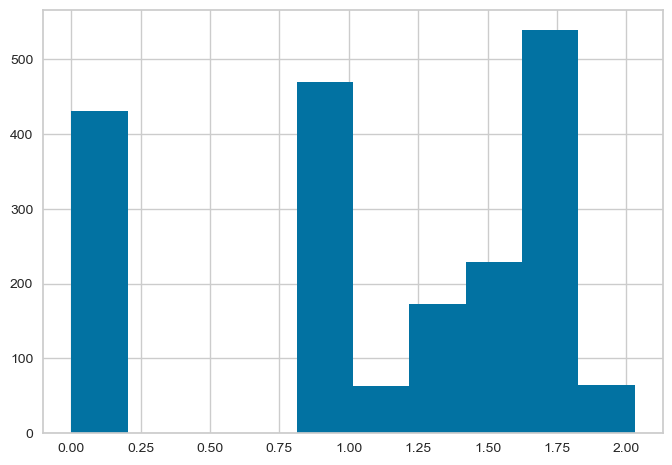

In [48]:
plt.hist(np.sqrt(df["Work_Experience"]))

Mối quan hệ giữa các biến  `numerical`:

In [49]:
display(df.drop(columns="CustomerID").corr())


Age  Annual_Income  Spending_Score  Work_Experience  \
Age              1.000000       0.089931       -0.029169         0.026500   
Annual_Income    0.089931       1.000000        0.025989         0.085399   
Spending_Score  -0.029169       0.025989        1.000000        -0.016236   
Work_Experience  0.026500       0.085399       -0.016236         1.000000   
Family_Size      0.059994       0.095754        0.001625         0.013975   

                 Family_Size  
Age                 0.059994  
Annual_Income       0.095754  
Spending_Score      0.001625  
Work_Experience     0.013975  
Family_Size         1.000000

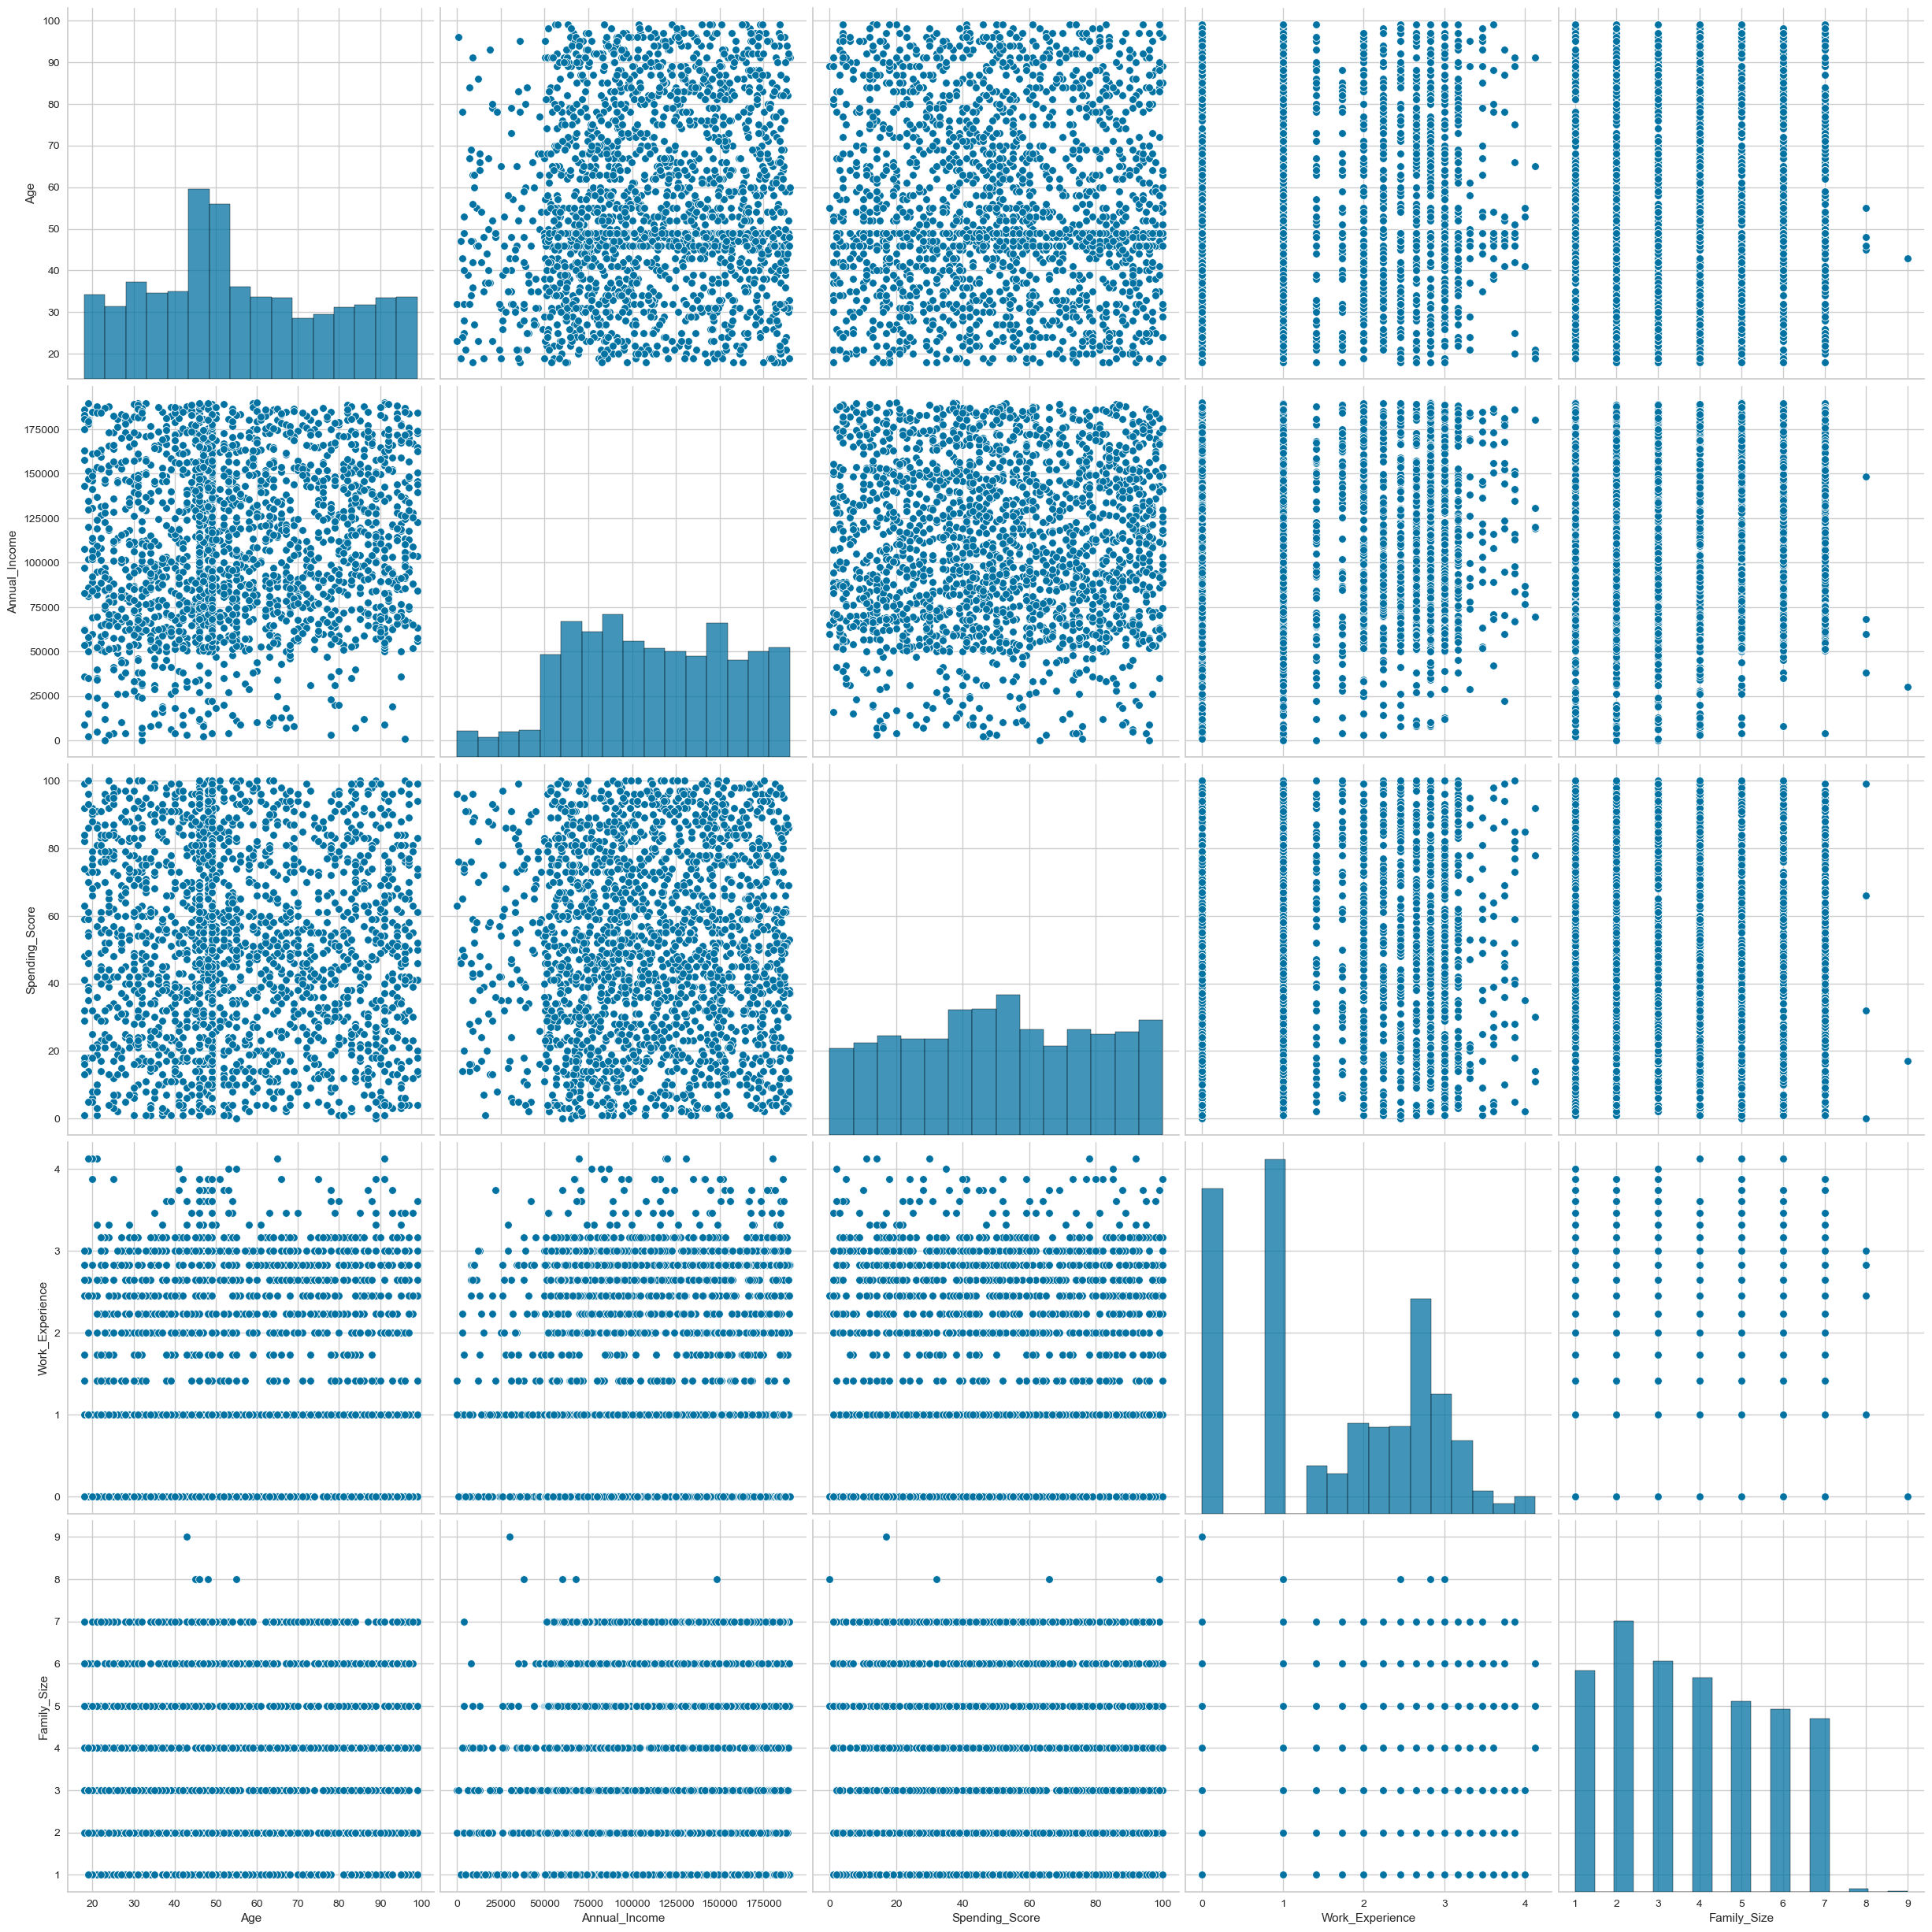

In [50]:
sns.pairplot(df[['Age','Annual_Income','Spending_Score','Work_Experience','Family_Size']],height=5)

Nhìn chung không có quan hệ đồng biến, nghịch biến nào giữa 2 biến một cách rõ ràng, nên ta sẽ sử dụng toàn bộ vào việc xây dựng mô hình.

Đối với các cột dữ liệu `categorical`: Thực hiện kỹ thuật One-hot Encoding để chuyển toàn bộ về dạng `numerical`

In [51]:
encoder=ce.OneHotEncoder(cols=['Gender','Profession'], return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df)

Bỏ cột `CustomerID`

In [52]:
df_encoded=df_encoded.drop(columns=["CustomerID"])

Kiểu dữ liệu của các cột:

In [53]:
df_encoded.dtypes

Gender_Male                   int64
Gender_Female                 int64
Age                           int64
Annual_Income                 int64
Spending_Score                int64
Profession_Healthcare         int64
Profession_Engineer           int64
Profession_Lawyer             int64
Profession_Entertainment      int64
Profession_Artist             int64
Profession_Executive          int64
Profession_Doctor             int64
Profession_Homemaker          int64
Profession_Marketing          int64
Profession_Other              int64
Work_Experience             float64
Family_Size                   int64
dtype: object

Giảm độ chênh lệch giữa các giá trị của các cột bằng Z-Score Normalization:

In [54]:
df_encoded = df_encoded.apply(zscore)
df_encoded=df_encoded.values
df_encoded

array([[ 1.21392672, -1.21392672, -1.7004328 , ..., -0.13452586,
        -0.55337446,  0.11807399],
       [ 1.21392672, -1.21392672, -1.60876163, ..., -0.13452586,
         0.07828422, -0.38954106],
       [-0.82377295,  0.82377295, -1.65459721, ..., -0.13452586,
        -0.55337446, -1.40477117],
       ...,
       [ 1.21392672, -1.21392672,  1.41638717, ..., -0.13452586,
         1.17234913, -0.89715612],
       [ 1.21392672, -1.21392672,  0.95803129, ..., -0.13452586,
         0.86668147, -0.89715612],
       [ 1.21392672, -1.21392672,  1.55389394, ..., -0.13452586,
         0.51318138, -0.89715612]])

### **2. Xây dựng mô hình**

In [55]:
# Number of clusters used to calculate the WSS and Silhouette Score
max_clusters = 20

In [56]:
df_encoded.shape

(1969, 17)

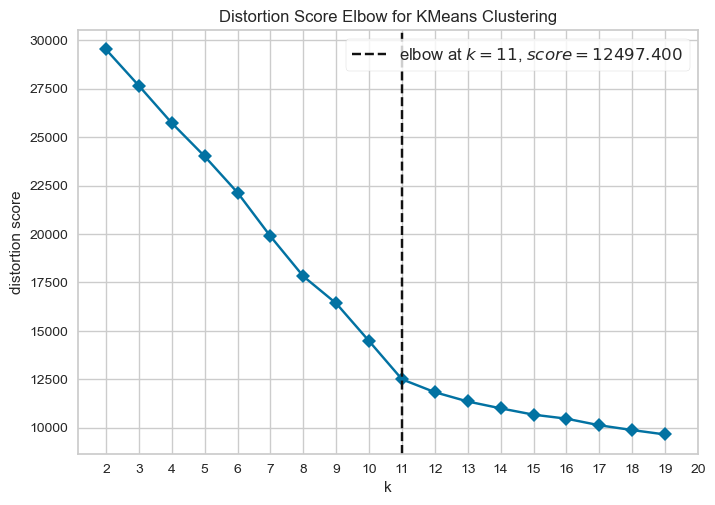

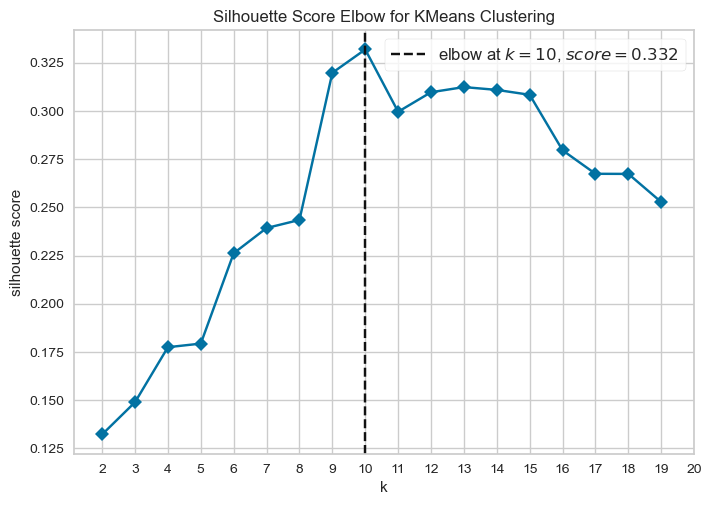

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [57]:
visualizer = KElbowVisualizer(KMeans(), k=(2,max_clusters),timings=False)
visualizer.fit(df_encoded)     
plt.xticks([i for i in range (2,max_clusters+1)])
visualizer.show() 

visualizer = KElbowVisualizer(KMeans(), k=(2,max_clusters),metric='silhouette',timings=False)
visualizer.fit(df_encoded)   
plt.xticks([i for i in range (2,max_clusters+1)])    
visualizer.show()     

Có vẻ như việc đưa vào 17 biến dữ liệu để xây dựng mô hình K-mean là không hợp lý. **Elbow Method** và  **Silhouette Score** đều cho số lượng clusters là khá lớn so với mục đích ban đầu phân nhóm khách hàng ở một siêu thị. Ta sẽ thử giảm số lượng biến đưa vào mô hình bằng cách xử dụng PCA để giảm chiều dữ liệu.

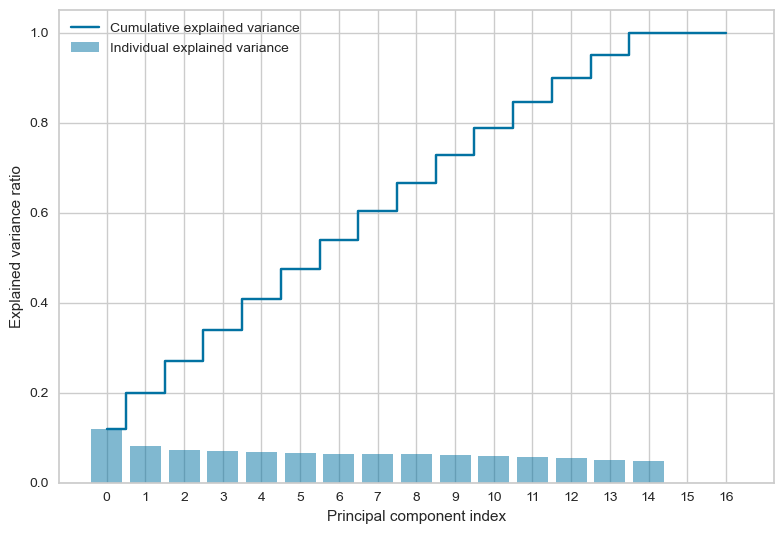

In [58]:
pca = decomposition.PCA()
X_train_pca = pca.fit_transform(df_encoded)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks([i for i in range (0,df_encoded.shape[1])])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Ta chọn số chiều sau khi giảm là 3.

In [59]:
pca = decomposition.PCA(n_components=3)
df_pca = pca.fit_transform(df_encoded)

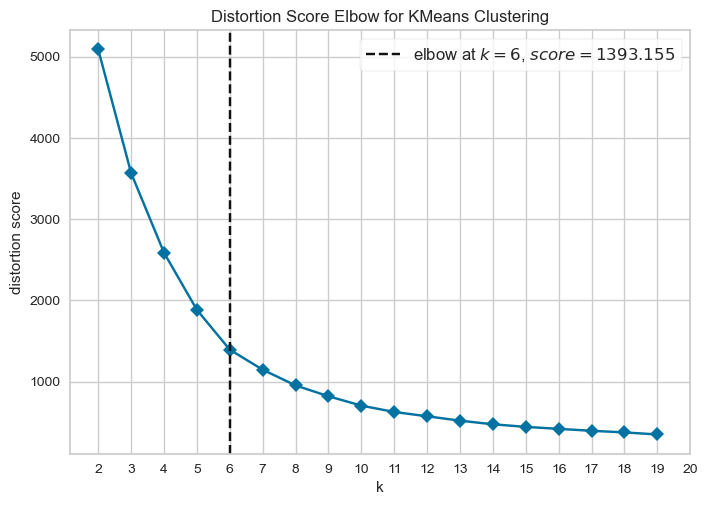

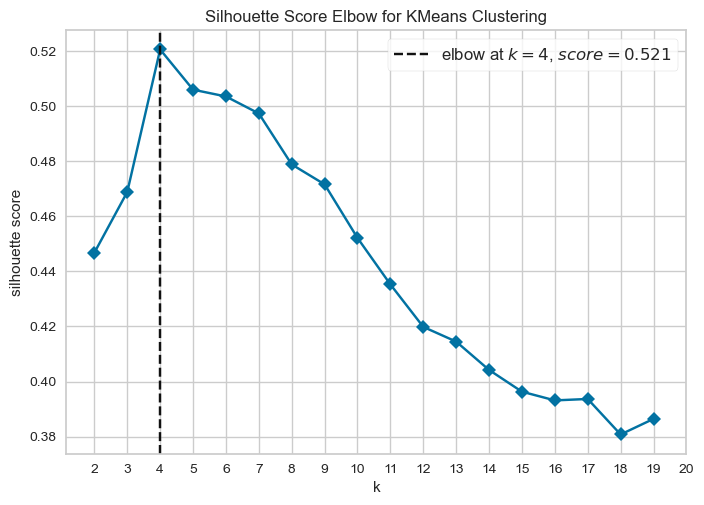

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [60]:
# k is range of number of clusters.
visualizer = KElbowVisualizer(KMeans(), k=(2,20),timings=False)
visualizer.fit(df_pca)  
plt.xticks([i for i in range (2,max_clusters+1)])      
visualizer.show()  

visualizer = KElbowVisualizer(KMeans(), k=(2,20),metric='silhouette',timings=False)
visualizer.fit(df_pca)  
plt.xticks([i for i in range (2,max_clusters+1)])     
visualizer.show()        

Ta sẽ chọn số lượng cluster theo **Silhouette Score** cao nhất là 4.

In [61]:
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(df_pca)
y_kmeans

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
df_results=pd.DataFrame(df_pca).rename(columns={0:"X_axis",1:"Y_axis",2:"Z_axis"})
df_results["y_kmeans"]=y_kmeans
df_results["ID"]=df["CustomerID"]
df_results

X_axis    Y_axis    Z_axis  y_kmeans      ID
0     1.719222 -0.492684  1.735620         0     1.0
1     1.701717  0.112333  0.658098         0     2.0
2    -1.166905 -0.419745  0.660512         1     3.0
3    -1.313534 -0.111366  3.099916         1     4.0
4    -1.022022 -0.864068  1.651642         1     5.0
...        ...       ...       ...       ...     ...
1964 -1.223979  0.904828 -2.474380         2  1965.0
1965 -0.958302 -0.964239 -0.528373         1  1966.0
1966  1.832915 -0.899461 -0.296453         0  1967.0
1967  1.835975 -0.737855 -1.515639         0  1968.0
1968  1.914783 -0.686454  0.631254         0  1969.0

[1969 rows x 5 columns]

#### **3. Trực quan hóa mô hình:**

In [63]:
fig = px.scatter_3d(df_results, x="X_axis", y="Y_axis", z="Z_axis",color='y_kmeans',hover_name = "ID")
fig.update_traces(marker_size = 2)
fig.show()

## **E. Tài liệu tham khảo**

https://simerp.io/blog/tim-hieu-nhu-cau-khach-hang/

https://vitalflux.com/pca-explained-variance-concept-python-example/

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://www.kaggle.com/code/utkarshsaxenadn/shop-customer-clustering?fbclid=IwAR29tq6_MlfU848Svyr_Rghg9U3nxiIYaZa3kHgURPZvRh1NwN8Lo8wrkp0